In [57]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
import json
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [58]:
df = pd.DataFrame({'X1' : [1,1,0,5,6,4], 'X2' : [4,3,4,1,2,0]})
df['cluster'] = 0
df['cluster'] = df['cluster'].apply(lambda x : np.random.choice([0,1]))

<Axes: xlabel='X1', ylabel='X2'>

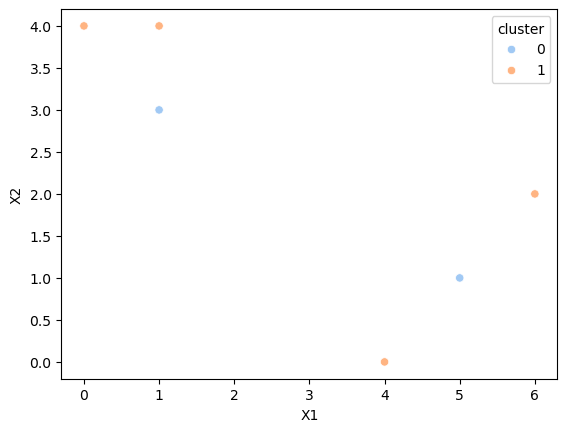

In [59]:
sns.scatterplot(df, x='X1', y='X2', hue='cluster')

In [60]:
centroid0 = df[df['cluster'] == 0]['X1'].mean(), df[df['cluster'] == 0]['X2'].mean()
centroid1 = df[df['cluster'] == 1]['X1'].mean(), df[df['cluster'] == 1]['X2'].mean()

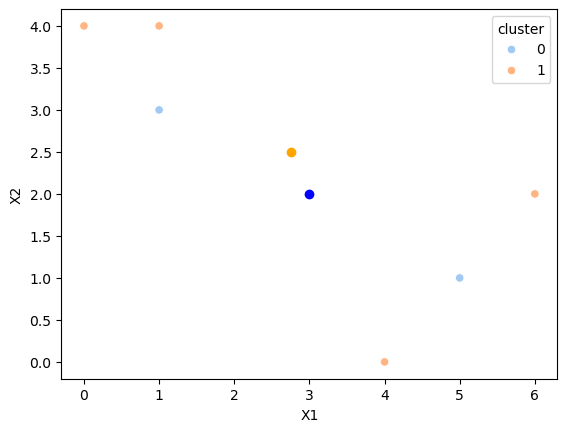

In [61]:
sns.scatterplot(df, x='X1', y='X2', hue='cluster')
plt.scatter(x=centroid0[0], y=centroid0[1], marker='o', color='blue')
plt.scatter(x=centroid1[0], y=centroid1[1], marker='o', color='orange')

In [62]:
df['cluster'] = df.apply(lambda x : 0 if 
                             np.sqrt((x['X1'] - centroid0[0])**2 + (x['X2'] - centroid0[1])**2) <
                             np.sqrt((x['X1'] - centroid1[0])**2 + (x['X2'] - centroid1[1])**2)
                         else 1, axis=1)

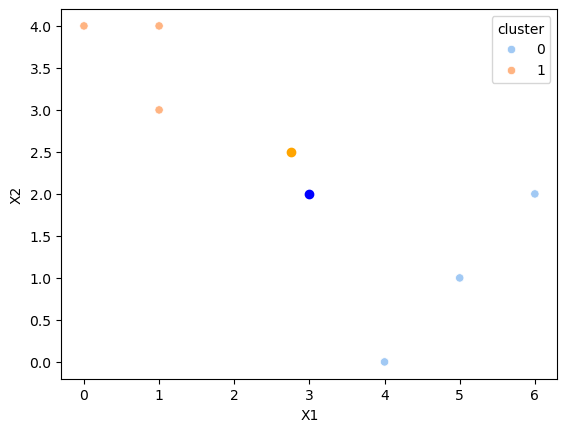

In [63]:
sns.scatterplot(df, x='X1', y='X2', hue='cluster')
plt.scatter(x=centroid0[0], y=centroid0[1], marker='o', color='blue')
plt.scatter(x=centroid1[0], y=centroid1[1], marker='o', color='orange')

In [64]:
centroid0 = df[df['cluster'] == 0]['X1'].mean(), df[df['cluster'] == 0]['X2'].mean()
centroid1 = df[df['cluster'] == 1]['X1'].mean(), df[df['cluster'] == 1]['X2'].mean()
df['cluster'] = df.apply(lambda x : 0 if 
                             np.sqrt((x['X1'] - centroid0[0])**2 + (x['X2'] - centroid0[1])**2) <
                             np.sqrt((x['X1'] - centroid1[0])**2 + (x['X2'] - centroid1[1])**2)
                         else 1, axis=1)

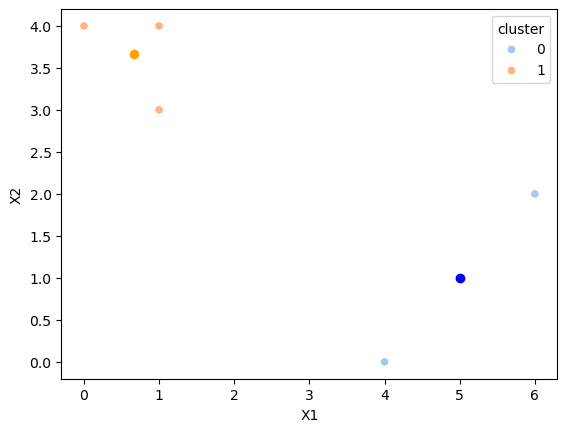

In [65]:
sns.scatterplot(df, x='X1', y='X2', hue='cluster')
plt.scatter(x=centroid0[0], y=centroid0[1], marker='o', color='blue')
plt.scatter(x=centroid1[0], y=centroid1[1], marker='o', color='orange')